In [1]:
%matplotlib inline 
import math as m
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from scipy import stats
from scipy.stats import kurtosis 
from scipy.stats import skew
import math
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from pandas.plotting import scatter_matrix
from random import sample

## Clean the data

In [2]:
Lake_Bilancino = pd.read_csv('Lake_Bilancino.csv')

In [3]:
# There aren't any valid values until Jan 01 2004
print(Lake_Bilancino[:577].isna().mean())

Date                    0.000000
Rainfall_S_Piero        1.000000
Rainfall_Mangona        1.000000
Rainfall_S_Agata        1.000000
Rainfall_Cavallina      1.000000
Rainfall_Le_Croci       1.000000
Temperature_Le_Croci    1.000000
Lake_Level              0.000000
Flow_Rate               0.036395
dtype: float64


In [4]:
# Cut the data from then Jan 01 2004
Lake_Bilancino_Cut = Lake_Bilancino[577:].reset_index(drop = True)

# Imputation 
Lake_Bilancino_Cut.loc[Lake_Bilancino_Cut.Date == '01/01/2004', 'Temperature_Le_Croci'] = Lake_Bilancino_Cut.Temperature_Le_Croci.mean()

In [5]:
# Create month column 
Lake_Bilancino_Cut['Month'] = Lake_Bilancino_Cut.Date.apply(lambda x: x[3:5])

# Create year column 
Lake_Bilancino_Cut['Year'] = Lake_Bilancino_Cut.Date.apply(lambda x: x[6:10])

## 4.1 What areas and weather conditions are most affecting water quality in lakes?


In [6]:
bilancino = pd.read_csv('Lake_Bilancino.csv')
bilancino

Date  Rainfall_S_Piero  Rainfall_Mangona  Rainfall_S_Agata  \
0     03/06/2002               NaN               NaN               NaN   
1     04/06/2002               NaN               NaN               NaN   
2     05/06/2002               NaN               NaN               NaN   
3     06/06/2002               NaN               NaN               NaN   
4     07/06/2002               NaN               NaN               NaN   
...          ...               ...               ...               ...   
6598  26/06/2020               0.0               0.0               0.0   
6599  27/06/2020               0.0               0.0               0.0   
6600  28/06/2020               0.0               0.0               0.0   
6601  29/06/2020               0.0               0.0               0.0   
6602  30/06/2020               0.0               0.0               0.0   

      Rainfall_Cavallina  Rainfall_Le_Croci  Temperature_Le_Croci  Lake_Level  \
0                    NaN                NaN                   NaN      249.43   
1                    NaN                NaN                   NaN      249.43   
2                    NaN                NaN                   NaN      249.43   
3                    NaN                NaN                   NaN      249.43   
4                    NaN                NaN                   NaN      249.44   
...                  ...                ...                   ...         ...   
6598                 0.0                0.0                 22.50      250.85   
6599                 0.0                0.0                 23.40      250.84   
6600                 0.0                0.0                 21.50      250.83   
6601                 0.0                0.0                 23.20      250.82   
6602                 0.0                0.0                 22.75      250.80   

      Flow_Rate  
0          0.31  
1          0.31  
2          0.31  
3          0.31  
4          0.31  
...         ...  
6598       0.60  
6599       0.60  
6600       0.60  
6601       0.60  
6602       0.60  

[6603 rows x 9 columns]

In [7]:
bilancino['Date'] = bilancino['Date'].astype(str)

bilancino['Month'] = bilancino['Date'].apply(lambda x: x[3:5])


array([[<AxesSubplot:xlabel='Rainfall_S_Piero', ylabel='Rainfall_S_Piero'>,
        <AxesSubplot:xlabel='Rainfall_Mangona', ylabel='Rainfall_S_Piero'>,
        <AxesSubplot:xlabel='Rainfall_S_Agata', ylabel='Rainfall_S_Piero'>,
        <AxesSubplot:xlabel='Rainfall_Cavallina', ylabel='Rainfall_S_Piero'>,
        <AxesSubplot:xlabel='Rainfall_Le_Croci', ylabel='Rainfall_S_Piero'>],
       [<AxesSubplot:xlabel='Rainfall_S_Piero', ylabel='Rainfall_Mangona'>,
        <AxesSubplot:xlabel='Rainfall_Mangona', ylabel='Rainfall_Mangona'>,
        <AxesSubplot:xlabel='Rainfall_S_Agata', ylabel='Rainfall_Mangona'>,
        <AxesSubplot:xlabel='Rainfall_Cavallina', ylabel='Rainfall_Mangona'>,
        <AxesSubplot:xlabel='Rainfall_Le_Croci', ylabel='Rainfall_Mangona'>],
       [<AxesSubplot:xlabel='Rainfall_S_Piero', ylabel='Rainfall_S_Agata'>,
        <AxesSubplot:xlabel='Rainfall_Mangona', ylabel='Rainfall_S_Agata'>,
        <AxesSubplot:xlabel='Rainfall_S_Agata', ylabel='Rainfall_S_Agata'>,
    

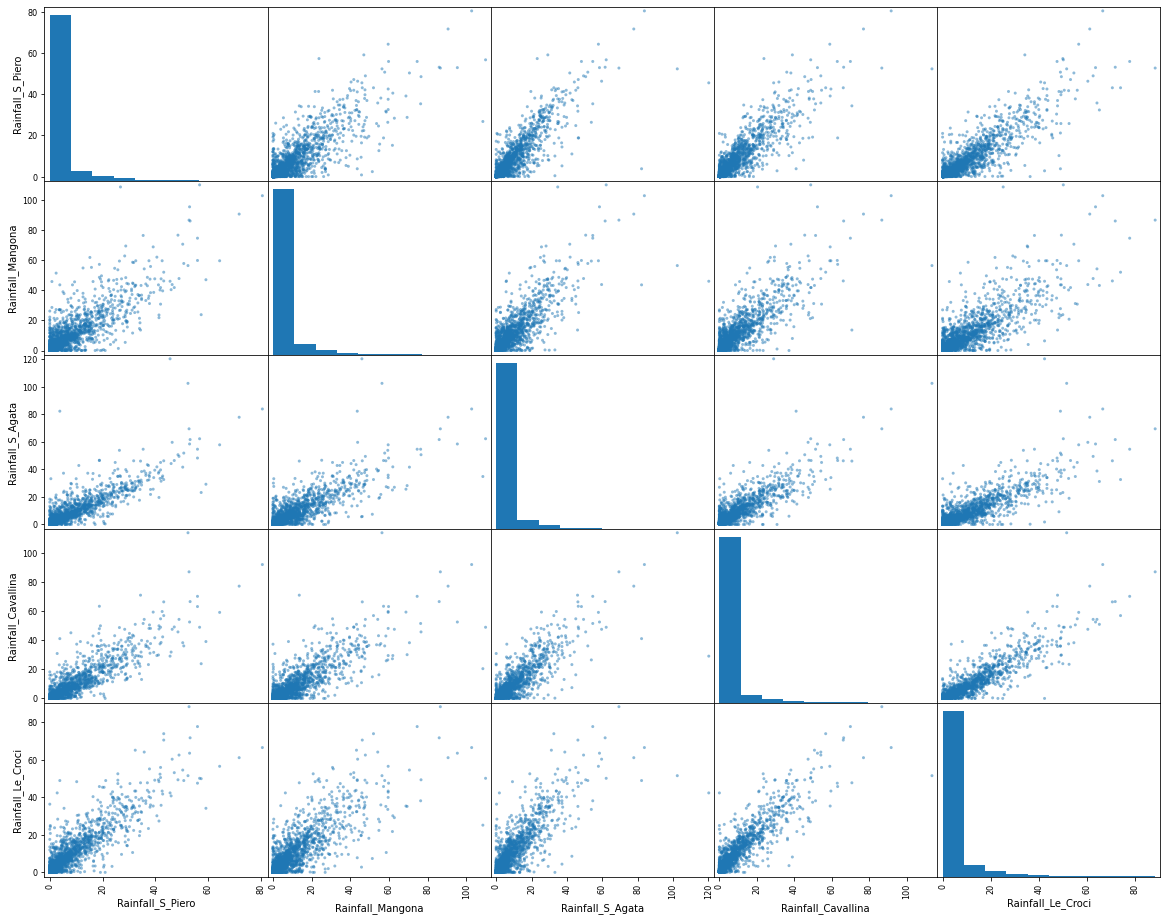

In [8]:

scatter_matrix(bilancino[['Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata', 'Rainfall_Cavallina', 'Rainfall_Le_Croci']], figsize=(20,16))


In [9]:
bilancino[['Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata', 'Rainfall_Cavallina', 'Rainfall_Le_Croci']].corr()

Rainfall_S_Piero  Rainfall_Mangona  Rainfall_S_Agata  \
Rainfall_S_Piero            1.000000          0.867117          0.897863   
Rainfall_Mangona            0.867117          1.000000          0.865833   
Rainfall_S_Agata            0.897863          0.865833          1.000000   
Rainfall_Cavallina          0.908543          0.873150          0.887618   
Rainfall_Le_Croci           0.910068          0.863780          0.880652   

                    Rainfall_Cavallina  Rainfall_Le_Croci  
Rainfall_S_Piero              0.908543           0.910068  
Rainfall_Mangona              0.873150           0.863780  
Rainfall_S_Agata              0.887618           0.880652  
Rainfall_Cavallina            1.000000           0.922999  
Rainfall_Le_Croci             0.922999           1.000000

In [10]:
bilancino.corr()

Rainfall_S_Piero  Rainfall_Mangona  Rainfall_S_Agata  \
Rainfall_S_Piero              1.000000          0.867117          0.897863   
Rainfall_Mangona              0.867117          1.000000          0.865833   
Rainfall_S_Agata              0.897863          0.865833          1.000000   
Rainfall_Cavallina            0.908543          0.873150          0.887618   
Rainfall_Le_Croci             0.910068          0.863780          0.880652   
Temperature_Le_Croci         -0.133295         -0.134986         -0.124250   
Lake_Level                   -0.034152         -0.032264         -0.032259   
Flow_Rate                     0.142241          0.166216          0.158884   

                      Rainfall_Cavallina  Rainfall_Le_Croci  \
Rainfall_S_Piero                0.908543           0.910068   
Rainfall_Mangona                0.873150           0.863780   
Rainfall_S_Agata                0.887618           0.880652   
Rainfall_Cavallina              1.000000           0.922999   
Rainfall_Le_Croci               0.922999           1.000000   
Temperature_Le_Croci           -0.128926          -0.139045   
Lake_Level                     -0.033957          -0.024512   
Flow_Rate                       0.172795           0.187022   

                      Temperature_Le_Croci  Lake_Level  Flow_Rate  
Rainfall_S_Piero                 -0.133295   -0.034152   0.142241  
Rainfall_Mangona                 -0.134986   -0.032264   0.166216  
Rainfall_S_Agata                 -0.124250   -0.032259   0.158884  
Rainfall_Cavallina               -0.128926   -0.033957   0.172795  
Rainfall_Le_Croci                -0.139045   -0.024512   0.187022  
Temperature_Le_Croci              1.000000    0.063569  -0.195136  
Lake_Level                        0.063569    1.000000   0.300370  
Flow_Rate                        -0.195136    0.300370   1.000000

### Piero

In [11]:
md = smf.mixedlm("Flow_Rate ~ Rainfall_S_Piero", bilancino, groups=bilancino["Month"], missing='drop')
mdf = md.fit()
print(mdf.summary())

          Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: Flow_Rate  
No. Observations:  6026    Method:             REML       
No. Groups:        12      Scale:              15.0823    
Min. group size:   480     Log-Likelihood:     -16753.8784
Max. group size:   527     Converged:          Yes        
Mean group size:   502.2                                  
----------------------------------------------------------
                 Coef. Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept        2.573    0.387  6.650 0.000  1.815  3.332
Rainfall_S_Piero 0.079    0.008 10.388 0.000  0.064  0.094
Group Var        1.762    0.197                           



In [12]:
md = smf.mixedlm("Lake_Level ~ Rainfall_S_Piero", bilancino, groups=bilancino["Month"], missing='drop')
mdf = md.fit()
print(mdf.summary())

             Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   Lake_Level 
No. Observations:   6026      Method:               REML       
No. Groups:         12        Scale:                2.4237     
Min. group size:    480       Log-Likelihood:       -11259.3178
Max. group size:    527       Converged:            Yes        
Mean group size:    502.2                                      
---------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
---------------------------------------------------------------
Intercept        249.498    0.465 536.865 0.000 248.587 250.409
Rainfall_S_Piero   0.010    0.003   3.329 0.001   0.004   0.016
Group Var          2.586    0.708                              



### Mangona


In [13]:
md = smf.mixedlm("Flow_Rate ~ Rainfall_Mangona", bilancino, groups=bilancino["Month"], missing='drop')
mdf = md.fit()
print(mdf.summary())

          Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: Flow_Rate  
No. Observations:  6026    Method:             REML       
No. Groups:        12      Scale:              14.9748    
Min. group size:   480     Log-Likelihood:     -16732.6056
Max. group size:   527     Converged:          Yes        
Mean group size:   502.2                                  
----------------------------------------------------------
                 Coef. Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept        2.535    0.385  6.589 0.000  1.781  3.289
Rainfall_Mangona 0.070    0.006 12.327 0.000  0.059  0.081
Group Var        1.742    0.195                           



In [14]:
md = smf.mixedlm("Lake_Level ~ Rainfall_Mangona", bilancino, groups=bilancino["Month"], missing='drop')
mdf = md.fit()
print(mdf.summary())

             Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   Lake_Level 
No. Observations:   6026      Method:               REML       
No. Groups:         12        Scale:                2.4230     
Min. group size:    480       Log-Likelihood:       -11258.8141
Max. group size:    527       Converged:            Yes        
Mean group size:    502.2                                      
---------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
---------------------------------------------------------------
Intercept        249.496    0.465 536.723 0.000 248.585 250.407
Rainfall_Mangona   0.008    0.002   3.560 0.000   0.004   0.013
Group Var          2.587    0.708                              



### S Agata

In [15]:
md = smf.mixedlm("Flow_Rate ~ Rainfall_S_Agata", bilancino, groups=bilancino["Month"], missing='drop')
mdf = md.fit()
print(mdf.summary())

          Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: Flow_Rate  
No. Observations:  6026    Method:             REML       
No. Groups:        12      Scale:              14.9867    
Min. group size:   480     Log-Likelihood:     -16734.8696
Max. group size:   527     Converged:          Yes        
Mean group size:   502.2                                  
----------------------------------------------------------
                 Coef. Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept        2.541    0.388  6.551 0.000  1.781  3.301
Rainfall_S_Agata 0.085    0.007 12.120 0.000  0.071  0.099
Group Var        1.772    0.198                           



In [16]:
md = smf.mixedlm("Lake_Level ~ Rainfall_S_Agata", bilancino, groups=bilancino["Month"], missing='drop')
mdf = md.fit()
print(mdf.summary())

             Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   Lake_Level 
No. Observations:   6026      Method:               REML       
No. Groups:         12        Scale:                2.4236     
Min. group size:    480       Log-Likelihood:       -11259.2906
Max. group size:    527       Converged:            Yes        
Mean group size:    502.2                                      
---------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
---------------------------------------------------------------
Intercept        249.498    0.465 536.894 0.000 248.587 250.409
Rainfall_S_Agata   0.010    0.003   3.360 0.001   0.004   0.015
Group Var          2.586    0.708                              



### Cavallina

In [17]:
md = smf.mixedlm("Flow_Rate ~ Rainfall_Cavallina", bilancino, groups=bilancino["Month"], missing='drop')
mdf = md.fit()
print(mdf.summary())

           Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  Flow_Rate  
No. Observations:  6026     Method:              REML       
No. Groups:        12       Scale:               14.9455    
Min. group size:   480      Log-Likelihood:      -16726.5424
Max. group size:   527      Converged:           Yes        
Mean group size:   502.2                                    
------------------------------------------------------------
                   Coef. Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------
Intercept          2.543    0.384  6.627 0.000  1.791  3.295
Rainfall_Cavallina 0.084    0.007 12.810 0.000  0.071  0.097
Group Var          1.734    0.194                           



In [18]:
md = smf.mixedlm("Lake_Level ~ Rainfall_Cavallina", bilancino, groups=bilancino["Month"], missing='drop')
mdf = md.fit()
print(mdf.summary())

              Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   Lake_Level 
No. Observations:     6026      Method:               REML       
No. Groups:           12        Scale:                2.4240     
Min. group size:      480       Log-Likelihood:       -11259.8327
Max. group size:      527       Converged:            Yes        
Mean group size:      502.2                                      
-----------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
-----------------------------------------------------------------
Intercept          249.500    0.465 536.982 0.000 248.590 250.411
Rainfall_Cavallina   0.009    0.003   3.215 0.001   0.003   0.014
Group Var            2.585    0.707                              



### Le Croci

In [19]:
md = smf.mixedlm("Flow_Rate ~ Rainfall_Le_Croci", bilancino, groups=bilancino["Month"], missing='drop')
mdf = md.fit()
print(mdf.summary())

           Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: Flow_Rate  
No. Observations:   6026    Method:             REML       
No. Groups:         12      Scale:              14.8742    
Min. group size:    480     Log-Likelihood:     -16712.1523
Max. group size:    527     Converged:          Yes        
Mean group size:    502.2                                  
-----------------------------------------------------------
                  Coef. Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept         2.496    0.382  6.533 0.000  1.747  3.245
Rainfall_Le_Croci 0.087    0.006 13.922 0.000  0.075  0.099
Group Var         1.717    0.193                           



In [20]:
md = smf.mixedlm("Lake_Level ~ Rainfall_Le_Croci", bilancino, groups=bilancino["Month"], missing='drop')
mdf = md.fit()
print(mdf.summary())

             Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   Lake_Level 
No. Observations:    6026      Method:               REML       
No. Groups:          12        Scale:                2.4234     
Min. group size:     480       Log-Likelihood:       -11259.1884
Max. group size:     527       Converged:            Yes        
Mean group size:     502.2                                      
----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
----------------------------------------------------------------
Intercept         249.496    0.465 537.075 0.000 248.586 250.407
Rainfall_Le_Croci   0.009    0.003   3.424 0.001   0.004   0.014
Group Var           2.584    0.707                              



In [21]:
pd.DataFrame({'Area': ['Piero', 'Mangona', 'S Agata', 'Cavallina', 'Le Croci'], 
              'Flow Rate Corr': [0.079, 0.070, 0.085, 0.084, 0.087], 'Lake Level Corr': [0.010, 0.008, 0.010, 0.009, 0.009]})

Area  Flow Rate Corr  Lake Level Corr
0      Piero           0.079            0.010
1    Mangona           0.070            0.008
2    S Agata           0.085            0.010
3  Cavallina           0.084            0.009
4   Le Croci           0.087            0.009

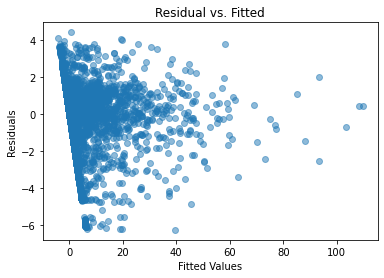

In [22]:
plt.scatter(bilancino['Rainfall_Mangona'].dropna() - mdf.resid, mdf.resid, alpha = 0.5)
plt.title("Residual vs. Fitted")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

## 4.2 Interval all the flow rates and categorize 0-25%,25%-50%,50%-75%,75%-100%, and group all the data annually to see if there is shortage or surplus in certain years.

In [23]:
LakeData=pd.read_csv('Lake_Bilancino.csv')
LakeData

Date  Rainfall_S_Piero  Rainfall_Mangona  Rainfall_S_Agata  \
0     03/06/2002               NaN               NaN               NaN   
1     04/06/2002               NaN               NaN               NaN   
2     05/06/2002               NaN               NaN               NaN   
3     06/06/2002               NaN               NaN               NaN   
4     07/06/2002               NaN               NaN               NaN   
...          ...               ...               ...               ...   
6598  26/06/2020               0.0               0.0               0.0   
6599  27/06/2020               0.0               0.0               0.0   
6600  28/06/2020               0.0               0.0               0.0   
6601  29/06/2020               0.0               0.0               0.0   
6602  30/06/2020               0.0               0.0               0.0   

      Rainfall_Cavallina  Rainfall_Le_Croci  Temperature_Le_Croci  Lake_Level  \
0                    NaN                NaN                   NaN      249.43   
1                    NaN                NaN                   NaN      249.43   
2                    NaN                NaN                   NaN      249.43   
3                    NaN                NaN                   NaN      249.43   
4                    NaN                NaN                   NaN      249.44   
...                  ...                ...                   ...         ...   
6598                 0.0                0.0                 22.50      250.85   
6599                 0.0                0.0                 23.40      250.84   
6600                 0.0                0.0                 21.50      250.83   
6601                 0.0                0.0                 23.20      250.82   
6602                 0.0                0.0                 22.75      250.80   

      Flow_Rate  
0          0.31  
1          0.31  
2          0.31  
3          0.31  
4          0.31  
...         ...  
6598       0.60  
6599       0.60  
6600       0.60  
6601       0.60  
6602       0.60  

[6603 rows x 9 columns]

In [24]:
LakeData=LakeData.dropna()
LakeData['totalRainfall']=LakeData.Rainfall_S_Piero+LakeData.Rainfall_Mangona+LakeData.Rainfall_S_Agata+LakeData.Rainfall_Cavallina+LakeData.Rainfall_Le_Croci
LakeData

<ipython-input-24-022f43b6541c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LakeData['totalRainfall']=LakeData.Rainfall_S_Piero+LakeData.Rainfall_Mangona+LakeData.Rainfall_S_Agata+LakeData.Rainfall_Cavallina+LakeData.Rainfall_Le_Croci


Date  Rainfall_S_Piero  Rainfall_Mangona  Rainfall_S_Agata  \
578   02/01/2004               0.0               0.0               0.0   
579   03/01/2004               0.0               0.0               0.0   
580   04/01/2004               0.0               0.0               0.0   
581   05/01/2004               0.2               0.0               0.0   
582   06/01/2004               0.0               0.0               0.0   
...          ...               ...               ...               ...   
6598  26/06/2020               0.0               0.0               0.0   
6599  27/06/2020               0.0               0.0               0.0   
6600  28/06/2020               0.0               0.0               0.0   
6601  29/06/2020               0.0               0.0               0.0   
6602  30/06/2020               0.0               0.0               0.0   

      Rainfall_Cavallina  Rainfall_Le_Croci  Temperature_Le_Croci  Lake_Level  \
578                  0.0                0.0                  6.50      251.21   
579                  0.0                0.0                  4.45      251.28   
580                  0.0                0.0                  2.00      251.35   
581                  0.0                0.0                  0.90      251.37   
582                  0.0                0.0                  2.25      251.42   
...                  ...                ...                   ...         ...   
6598                 0.0                0.0                 22.50      250.85   
6599                 0.0                0.0                 23.40      250.84   
6600                 0.0                0.0                 21.50      250.83   
6601                 0.0                0.0                 23.20      250.82   
6602                 0.0                0.0                 22.75      250.80   

      Flow_Rate  totalRainfall  
578         0.5            0.0  
579         0.5            0.0  
580         0.5            0.0  
581         0.5            0.2  
582         0.5            0.0  
...         ...            ...  
6598        0.6            0.0  
6599        0.6            0.0  
6600        0.6            0.0  
6601        0.6            0.0  
6602        0.6            0.0  

[6025 rows x 10 columns]

In [25]:
# Returns descriptive statistics on any dataset and weight column.
def descriptive_stats(dataset, weight_column):
    col = dataset[weight_column]
    print('Mean:', np.mean(col))
    print('Median:', np.median(col))
    print('Q1:', np.percentile(col, 25))
    print('Q2:', np.percentile(col, 50))
    print('Q3:', np.percentile(col, 75))
    print('Q4:', np.percentile(col, 100))
    print('Inter-Quartile Range:', np.percentile(col, 75) - np.percentile(col, 25))
    print('Standard Deviation:', np.std(col))
    print('Variance:', np.var(col))
    print('Range:', np.max(col) - np.min(col))
    print('-----------------------------------------')

<AxesSubplot:title={'center':'Histogram of All Lake_Level'}, ylabel='Frequency'>

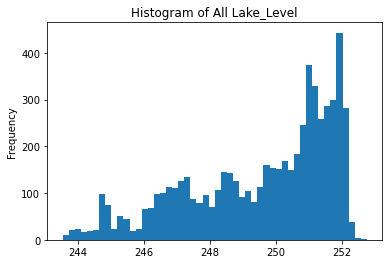

In [26]:
LakeData['Lake_Level'].plot(kind='hist',bins=50, title='Histogram of All Lake_Level')

In [27]:
descriptive_stats(LakeData,'Lake_Level')

Mean: 249.5534721991694
Median: 250.24
Q1: 247.93
Q2: 250.24
Q3: 251.37
Q4: 252.76
Inter-Quartile Range: 3.4399999999999977
Standard Deviation: 2.183152760808995
Variance: 4.766155977027938
Range: 9.22999999999999
-----------------------------------------


<AxesSubplot:title={'center':'Histogram of All Flow_Rate'}, ylabel='Frequency'>

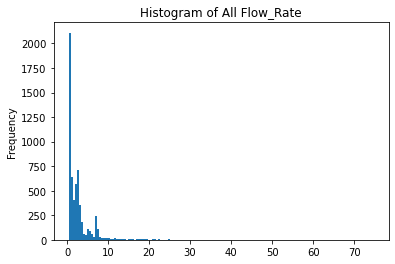

In [28]:
LakeData['Flow_Rate'].plot(kind='hist',bins=150, title='Histogram of All Flow_Rate',xlabel='flow rate')

In [29]:
descriptive_stats(LakeData,'Flow_Rate')

Mean: 2.7782041493776783
Median: 1.5
Q1: 0.6
Q2: 1.5
Q3: 3.0
Q4: 74.65
Inter-Quartile Range: 2.4
Standard Deviation: 4.130833602567077
Variance: 17.063786252097298
Range: 74.2
-----------------------------------------


In [30]:
avg_Lake_Level=np.mean(LakeData['Lake_Level'])
avg_Lake_Level

249.5534721991694

In [31]:
avg_Flow_Rate=np.mean(LakeData['Flow_Rate'])
avg_Flow_Rate

2.7782041493776783

In [32]:
kurtosis(LakeData['Flow_Rate'],fisher=True)

60.385903015041045

In [33]:
num_NRain=0
sum_Flow_Rate_NRain=0

In [34]:
for x,y in zip(LakeData['totalRainfall'],LakeData['Flow_Rate']):
    if(x==0):
        num_NRain+=1
        sum_Flow_Rate_NRain+=y
        

In [35]:
sum_Flow_Rate_NRain
num_NRain
avg_Flow_Rate_NRain= sum_Flow_Rate_NRain/num_NRain
avg_Flow_Rate_NRain

2.2328916470983247

In [36]:
LakeData['dflowRate']=LakeData['Flow_Rate']-avg_Flow_Rate_NRain
LakeData["Date"] = pd.to_datetime(LakeData["Date"])
LakeData["Year"] = pd.DatetimeIndex(LakeData["Date"]).year
LakeData

<ipython-input-36-42c075d3b44a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LakeData['dflowRate']=LakeData['Flow_Rate']-avg_Flow_Rate_NRain
<ipython-input-36-42c075d3b44a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LakeData["Date"] = pd.to_datetime(LakeData["Date"])
<ipython-input-36-42c075d3b44a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

Date  Rainfall_S_Piero  Rainfall_Mangona  Rainfall_S_Agata  \
578  2004-02-01               0.0               0.0               0.0   
579  2004-03-01               0.0               0.0               0.0   
580  2004-04-01               0.0               0.0               0.0   
581  2004-05-01               0.2               0.0               0.0   
582  2004-06-01               0.0               0.0               0.0   
...         ...               ...               ...               ...   
6598 2020-06-26               0.0               0.0               0.0   
6599 2020-06-27               0.0               0.0               0.0   
6600 2020-06-28               0.0               0.0               0.0   
6601 2020-06-29               0.0               0.0               0.0   
6602 2020-06-30               0.0               0.0               0.0   

      Rainfall_Cavallina  Rainfall_Le_Croci  Temperature_Le_Croci  Lake_Level  \
578                  0.0                0.0                  6.50      251.21   
579                  0.0                0.0                  4.45      251.28   
580                  0.0                0.0                  2.00      251.35   
581                  0.0                0.0                  0.90      251.37   
582                  0.0                0.0                  2.25      251.42   
...                  ...                ...                   ...         ...   
6598                 0.0                0.0                 22.50      250.85   
6599                 0.0                0.0                 23.40      250.84   
6600                 0.0                0.0                 21.50      250.83   
6601                 0.0                0.0                 23.20      250.82   
6602                 0.0                0.0                 22.75      250.80   

      Flow_Rate  totalRainfall  dflowRate  Year  
578         0.5            0.0  -1.732892  2004  
579         0.5            0.0  -1.732892  2004  
580         0.5            0.0  -1.732892  2004  
581         0.5            0.2  -1.732892  2004  
582         0.5            0.0  -1.732892  2004  
...         ...            ...        ...   ...  
6598        0.6            0.0  -1.632892  2020  
6599        0.6            0.0  -1.632892  2020  
6600        0.6            0.0  -1.632892  2020  
6601        0.6            0.0  -1.632892  2020  
6602        0.6            0.0  -1.632892  2020  

[6025 rows x 12 columns]

In [37]:
avg_Flow_Rate_Annually_list=[]
davg_Flow_Rate_Annually_list=[]
davg_Lake_Level_list=[]
sum_RF_Anually_list=[]
time=[2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
average_LakeL=[]

In [38]:
for x in range(2004,2021):
    LakeDataY=LakeData[~(LakeData['Year']!=x)]
    avg_Flow_Rate_Annually=np.mean(LakeDataY['Flow_Rate'])
    davg_Lake_Level=np.mean(LakeDataY['Lake_Level'])
    average_LakeL.append(davg_Lake_Level)
    davg_Flow_Rate_Annually=avg_Flow_Rate_Annually-avg_Flow_Rate
    sum_RF_Anually=LakeDataY['totalRainfall'].sum()
    davg_Lake_Level_list.append(davg_Lake_Level-avg_Lake_Level)
    avg_Flow_Rate_Annually_list.append(avg_Flow_Rate_Annually)
    davg_Flow_Rate_Annually_list.append(davg_Flow_Rate_Annually)
    sum_RF_Anually_list.append(sum_RF_Anually)

In [39]:
Q1data=np.transpose([avg_Flow_Rate_Annually_list,davg_Flow_Rate_Annually_list,sum_RF_Anually_list,davg_Lake_Level_list,time,average_LakeL])

In [40]:
Q1data = pd.DataFrame(Q1data, columns=["avg_Flow_Rate_Annually", "davg_Flow_Rate_Annually", "sum_RF_Anually","davg_Lake_Level","time","avg_LakeL"])
Q1data

avg_Flow_Rate_Annually  davg_Flow_Rate_Annually  sum_RF_Anually  \
0                 3.764932                 0.986727          5108.0   
1                 2.833151                 0.054947          5243.8   
2                 3.693973                 0.915768          4222.0   
3                 1.489205                -1.288999          3939.6   
4                 1.536120                -1.242084          5074.8   
5                 3.073726                 0.295522          5119.2   
6                 4.492877                 1.714673          7134.0   
7                 2.668219                -0.109985          3724.8   
8                 1.036339                -1.741865          4477.8   
9                 4.222658                 1.444453          6228.6   
10                4.096932                 1.318727          7237.8   
11                2.073288                -0.704916          4444.6   
12                2.485710                -0.292494          5671.8   
13                1.821068                -0.957136          4968.2   
14                2.885014                 0.106810          5041.0   
15                2.548740                -0.229464          6366.8   
16                2.253352                -0.524853          2087.6   

    davg_Lake_Level    time   avg_LakeL  
0          0.739158  2004.0  250.292630  
1          1.179158  2005.0  250.732630  
2          0.576528  2006.0  250.130000  
3         -1.078541  2007.0  248.474932  
4         -0.561560  2008.0  248.991913  
5         -0.002760  2009.0  249.550712  
6          1.413185  2010.0  250.966658  
7         -0.401253  2011.0  249.152219  
8         -3.624510  2012.0  245.928962  
9          0.687925  2013.0  250.241397  
10         0.424665  2014.0  249.978137  
11         0.053377  2015.0  249.606849  
12         0.022894  2016.0  249.576366  
13        -0.432157  2017.0  249.121315  
14         0.261377  2018.0  249.814849  
15         0.246774  2019.0  249.800247  
16         1.017077  2020.0  250.570549

<AxesSubplot:title={'center':'Histogram of All davg_Flow_Rate_Annually'}, ylabel='Frequency'>

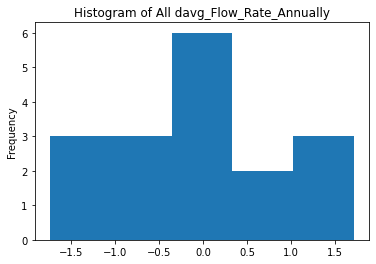

In [41]:
Q1data['davg_Flow_Rate_Annually'].plot(kind='hist',bins=5, title='Histogram of All davg_Flow_Rate_Annually',xlabel='flow rate')

In [42]:
kurtosis(Q1data['davg_Flow_Rate_Annually'])

-0.9828149741971735

## 4.3 Time series model of each year, to see the general behavior of the lake flow rate, to if if there is any unusual behavior (ex: drought), 

<AxesSubplot:title={'center':'Histogram of davg_Lake_Level'}, ylabel='Frequency'>

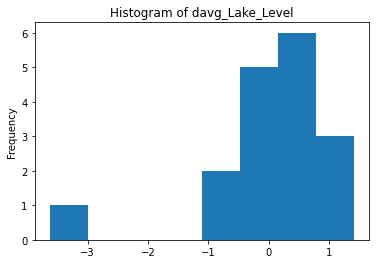

In [43]:
Q1data['davg_Lake_Level'].plot(kind='hist', bins=8, title='Histogram of davg_Lake_Level')

In [44]:
descriptive_stats(Q1data,'davg_Lake_Level')

Mean: 0.030666932017251222
Median: 0.2467743761730219
Q1: -0.4012530210870864
Q2: 0.2467743761730219
Q3: 0.6879250611044654
Q4: 1.4131853350770314
Inter-Quartile Range: 1.0891780821915518
Standard Deviation: 1.1123456891517194
Variance: 1.2373129321744134
Range: 5.037695785612755
-----------------------------------------


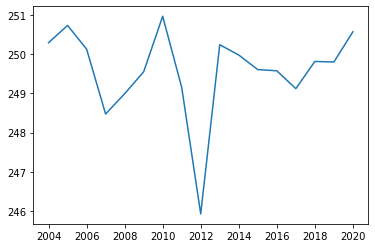

In [45]:
plt.plot(Q1data['time'],Q1data['avg_LakeL'])

## 4.4 Investigation into the 2012 lake levels

In [46]:
Lake_Bilancino = pd.read_csv('Lake_Bilancino.csv')

In [47]:
# There aren't any valid values until Jan 01 2004
print(Lake_Bilancino[:577].isna().mean())

Date                    0.000000
Rainfall_S_Piero        1.000000
Rainfall_Mangona        1.000000
Rainfall_S_Agata        1.000000
Rainfall_Cavallina      1.000000
Rainfall_Le_Croci       1.000000
Temperature_Le_Croci    1.000000
Lake_Level              0.000000
Flow_Rate               0.036395
dtype: float64


In [48]:
Lake_Bilancino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  6603 non-null   object 
 1   Rainfall_S_Piero      6026 non-null   float64
 2   Rainfall_Mangona      6026 non-null   float64
 3   Rainfall_S_Agata      6026 non-null   float64
 4   Rainfall_Cavallina    6026 non-null   float64
 5   Rainfall_Le_Croci     6026 non-null   float64
 6   Temperature_Le_Croci  6025 non-null   float64
 7   Lake_Level            6603 non-null   float64
 8   Flow_Rate             6582 non-null   float64
dtypes: float64(8), object(1)
memory usage: 464.4+ KB


In [49]:
Lake_Bilancino

Date  Rainfall_S_Piero  Rainfall_Mangona  Rainfall_S_Agata  \
0     03/06/2002               NaN               NaN               NaN   
1     04/06/2002               NaN               NaN               NaN   
2     05/06/2002               NaN               NaN               NaN   
3     06/06/2002               NaN               NaN               NaN   
4     07/06/2002               NaN               NaN               NaN   
...          ...               ...               ...               ...   
6598  26/06/2020               0.0               0.0               0.0   
6599  27/06/2020               0.0               0.0               0.0   
6600  28/06/2020               0.0               0.0               0.0   
6601  29/06/2020               0.0               0.0               0.0   
6602  30/06/2020               0.0               0.0               0.0   

      Rainfall_Cavallina  Rainfall_Le_Croci  Temperature_Le_Croci  Lake_Level  \
0                    NaN                NaN                   NaN      249.43   
1                    NaN                NaN                   NaN      249.43   
2                    NaN                NaN                   NaN      249.43   
3                    NaN                NaN                   NaN      249.43   
4                    NaN                NaN                   NaN      249.44   
...                  ...                ...                   ...         ...   
6598                 0.0                0.0                 22.50      250.85   
6599                 0.0                0.0                 23.40      250.84   
6600                 0.0                0.0                 21.50      250.83   
6601                 0.0                0.0                 23.20      250.82   
6602                 0.0                0.0                 22.75      250.80   

      Flow_Rate  
0          0.31  
1          0.31  
2          0.31  
3          0.31  
4          0.31  
...         ...  
6598       0.60  
6599       0.60  
6600       0.60  
6601       0.60  
6602       0.60  

[6603 rows x 9 columns]

In [50]:
nulls = pd.DataFrame(Lake_Bilancino.isnull().sum(), columns=['null_count'])
nulls['percent'] = round((nulls.null_count / Lake_Bilancino.shape[0] * 100),1)

In [51]:
nulls

null_count  percent
Date                           0      0.0
Rainfall_S_Piero             577      8.7
Rainfall_Mangona             577      8.7
Rainfall_S_Agata             577      8.7
Rainfall_Cavallina           577      8.7
Rainfall_Le_Croci            577      8.7
Temperature_Le_Croci         578      8.8
Lake_Level                     0      0.0
Flow_Rate                     21      0.3

Since the percent of nulls for each column is less than 9%, we decided to just drop the rows affected with null values.

In [52]:
# Cut the data from then Jan 01 2004
Lake_Bilancino_Cut = Lake_Bilancino[577:].reset_index(drop = True)

# Imputation 
Lake_Bilancino_Cut.loc[Lake_Bilancino_Cut.Date == '01/01/2004', 'Temperature_Le_Croci'] = Lake_Bilancino_Cut.Temperature_Le_Croci.mean()

In [53]:
# Create month column 
Lake_Bilancino_Cut['Month'] = Lake_Bilancino_Cut.Date.apply(lambda x: x[3:5])

# Create year column 
Lake_Bilancino_Cut['Year'] = Lake_Bilancino_Cut.Date.apply(lambda x: x[6:10])

In [54]:
Lake_Bilancino_Cut.isna().sum()

Date                    0
Rainfall_S_Piero        0
Rainfall_Mangona        0
Rainfall_S_Agata        0
Rainfall_Cavallina      0
Rainfall_Le_Croci       0
Temperature_Le_Croci    0
Lake_Level              0
Flow_Rate               0
Month                   0
Year                    0
dtype: int64

In [55]:
Lake_Bilancino_Cut

Date  Rainfall_S_Piero  Rainfall_Mangona  Rainfall_S_Agata  \
0     01/01/2004               0.0               0.0               0.4   
1     02/01/2004               0.0               0.0               0.0   
2     03/01/2004               0.0               0.0               0.0   
3     04/01/2004               0.0               0.0               0.0   
4     05/01/2004               0.2               0.0               0.0   
...          ...               ...               ...               ...   
6021  26/06/2020               0.0               0.0               0.0   
6022  27/06/2020               0.0               0.0               0.0   
6023  28/06/2020               0.0               0.0               0.0   
6024  29/06/2020               0.0               0.0               0.0   
6025  30/06/2020               0.0               0.0               0.0   

      Rainfall_Cavallina  Rainfall_Le_Croci  Temperature_Le_Croci  Lake_Level  \
0                    0.0                0.0             14.530141      251.14   
1                    0.0                0.0              6.500000      251.21   
2                    0.0                0.0              4.450000      251.28   
3                    0.0                0.0              2.000000      251.35   
4                    0.0                0.0              0.900000      251.37   
...                  ...                ...                   ...         ...   
6021                 0.0                0.0             22.500000      250.85   
6022                 0.0                0.0             23.400000      250.84   
6023                 0.0                0.0             21.500000      250.83   
6024                 0.0                0.0             23.200000      250.82   
6025                 0.0                0.0             22.750000      250.80   

      Flow_Rate Month  Year  
0           0.5    01  2004  
1           0.5    01  2004  
2           0.5    01  2004  
3           0.5    01  2004  
4           0.5    01  2004  
...         ...   ...   ...  
6021        0.6    06  2020  
6022        0.6    06  2020  
6023        0.6    06  2020  
6024        0.6    06  2020  
6025        0.6    06  2020  

[6026 rows x 11 columns]

In [56]:
zeros = pd.DataFrame(Lake_Bilancino.isnull().sum(), columns=['null_count'])
zeros['percent'] = round((nulls.null_count / Lake_Bilancino.shape[0] * 100),1)

In [57]:
Lake_Bilancino_Cut.eq(0).any()

Date                    False
Rainfall_S_Piero         True
Rainfall_Mangona         True
Rainfall_S_Agata         True
Rainfall_Cavallina       True
Rainfall_Le_Croci        True
Temperature_Le_Croci     True
Lake_Level              False
Flow_Rate               False
Month                   False
Year                    False
dtype: bool

In [58]:
lakeLevelByYear = pd.DataFrame(Lake_Bilancino_Cut.groupby('Year')['Lake_Level'].mean())
lakeLevelByYear['Year'] = lakeLevelByYear.index
lakeLevelByYear = lakeLevelByYear.reset_index(drop = True)

In [59]:
lakeLevelByYear.Lake_Level.mean() - lakeLevelByYear.Lake_Level.min()

3.6553135718591534

In [60]:
def water_conversion(water_gain): #water gain/loss in meters
    return ((5 * water_gain)/1000)*1000*1000

While the rise and fall of the water levels may seem insignificant on paper, it has an actual impact on the amount of water lost or gain. One meter of water in the lake level lost is equivelent to around 5000L of water. To take this into perspective, we will take a look at an 'outlier' in the data. As mentioned earlier, 2012 was the year that the lake level took a noticeble dip. It decreased from the average of 249.58 meters (between all the years) to a 245.93 meters on average (within 2012). That is a decrease in 3.66 meters of water depth, equal to around an 18276.57 L water decrease.

In [61]:
water_conversion(3.6553135718591534)

18276.567859295767

[Text(0.5, 0, 'Depth of Lake (Meters)')]

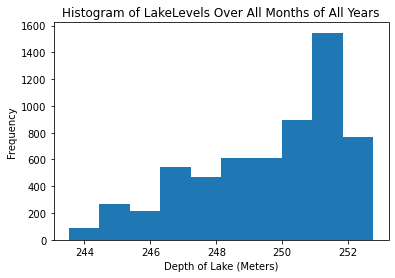

In [62]:
Lake_Bilancino_Cut.Lake_Level.plot(kind = 'hist', title = 'Histogram of LakeLevels Over All Months of All Years').set(xlabel = 'Depth of Lake (Meters)')

When plotting a preliminary histogram of the distribution of lake levels, we see a left skewed graph with a somewhat unimodal distribution shape. As stated earlier, we see a clear indication that one of the years had a drop in lake levels. We found out that it was during 2012 that this outlier occurred. 

In [63]:
lake_2012 = Lake_Bilancino_Cut[Lake_Bilancino_Cut['Year'] == '2012']
month_list = ['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep' ,'Oct' ,'Nov', 'Dec']

<AxesSubplot:title={'center':'Lake Levels at Months in 2012'}, xlabel='Month'>

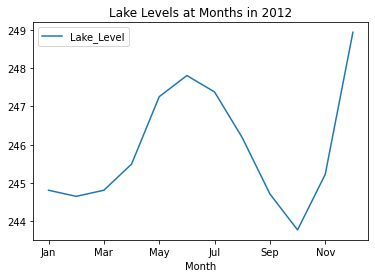

In [64]:
levelsByMonth2012 = pd.DataFrame(lake_2012.groupby('Month')['Lake_Level'].mean())
levelsByMonth2012.reset_index(drop=False,inplace = True)
levelsByMonth2012['Month'] = month_list
levelsByMonth2012.plot(kind = 'line',x = 'Month',title = 'Lake Levels at Months in 2012')

In [65]:
levelsByMonth2012.describe()

Lake_Level
count   12.000000
mean   245.920833
std      1.577242
min    243.777742
25%    244.788844
50%    245.360667
75%    247.284274
max    248.934516

Here we can observe that the lowest water level at the lake during 2012 was in October. It had a level of 243.78 Meters, 2.143 Meters below the average for 2012. That is around 10715.46 liters of water below the 2012 average water level, which in our case, is already the lowest lake-level year of the dataset.

In [66]:
water_conversion(245.920833 - 243.77774193548387)

10715.455322580567

In [67]:
lake_2012

Date  Rainfall_S_Piero  Rainfall_Mangona  Rainfall_S_Agata  \
2922  01/01/2012               0.0               0.0               0.0   
2923  02/01/2012              12.6              12.0              13.6   
2924  03/01/2012               3.8               1.2               5.0   
2925  04/01/2012               2.0               3.6               2.0   
2926  05/01/2012               2.2               3.6               2.0   
...          ...               ...               ...               ...   
3283  27/12/2012               0.0               1.0               1.4   
3284  28/12/2012               0.0               0.0               0.0   
3285  29/12/2012               0.0               0.0               0.0   
3286  30/12/2012               0.0               0.0               0.0   
3287  31/12/2012               0.0               0.0               0.0   

      Rainfall_Cavallina  Rainfall_Le_Croci  Temperature_Le_Croci  Lake_Level  \
2922                 0.0                0.0                  7.45      244.77   
2923                13.4               13.4                  9.25      244.75   
2924                 3.8                4.0                  8.50      244.80   
2925                 2.6                3.6                  7.30      244.82   
2926                 1.8                3.2                  6.75      244.84   
...                  ...                ...                   ...         ...   
3283                 1.6                3.2                 10.40      249.89   
3284                 0.0                0.2                 11.40      249.93   
3285                 0.0                0.0                 10.05      249.98   
3286                 0.0                0.0                  6.80      250.01   
3287                 0.0                0.0                  9.00      250.02   

      Flow_Rate Month  Year  
2922        0.6    01  2012  
2923        0.6    01  2012  
2924        0.6    01  2012  
2925        0.6    01  2012  
2926        0.6    01  2012  
...         ...   ...   ...  
3283        1.5    12  2012  
3284        1.5    12  2012  
3285        1.5    12  2012  
3286        1.5    12  2012  
3287        1.5    12  2012  

[366 rows x 11 columns]

In [68]:
data_kurt_coef = stats.kurtosis(lake_2012.Lake_Level)
data_kurt_coef

-0.24627312592603223

In [69]:
#Kurtosis test on the 2012 Lake Levels
kurtosis_coefs = []
for i in range(1000):
    distribution = Lake_Bilancino_Cut.Lake_Level
    sample_arr = sample(list(distribution),365)
    kurtosis_coefs.append(stats.kurtosis(sample_arr))

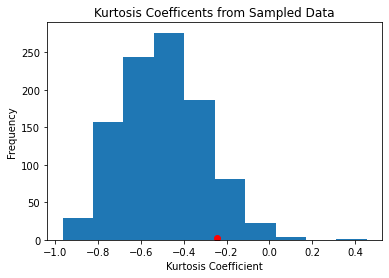

In [70]:
ax = pd.DataFrame(kurtosis_coefs).plot(kind = 'hist',legend = False,title = 'Kurtosis Coefficents from Sampled Data')
ax.set(xlabel = 'Kurtosis Coefficient')
ax.plot(data_kurt_coef, 3, "or")

In [71]:
pd.DataFrame(kurtosis_coefs).describe().rename({0:'Descriptive Stats'},axis = 1)

Descriptive Stats
count        1000.000000
mean           -0.498084
std             0.189707
min            -0.965706
25%            -0.643618
50%            -0.503093
75%            -0.375366
max             0.455333

After a kurtosis test, we affirmed that the 2012 data rejects the null hypothesis and favors the alternative that it is not normally distributed. The Kurtosis Coefficient of the 2012 lake data is -0.246, which falls under the skew of the graph, thus deeming the data is not normaly distributed. This is presumably since the 2012 lake levels were left skewed to begin with. 

<AxesSubplot:ylabel='Frequency'>

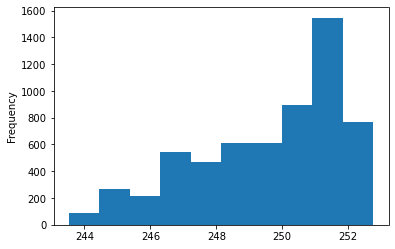

In [72]:
Lake_Bilancino_Cut.Lake_Level.plot(kind = 'hist')

## 4.5 Number of rainfall affects the flow rate or water level of the water body

<AxesSubplot:title={'center':'Histogram of sum_RF_Anually'}, ylabel='Frequency'>

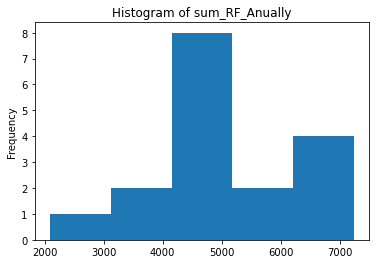

In [73]:
Q1data['sum_RF_Anually'].plot(kind='hist',bins=5, title='Histogram of sum_RF_Anually')

In [74]:
kurtosis(Q1data['sum_RF_Anually'])

0.30176191599124724

<AxesSubplot:title={'center':'ScatterPlot of davg_FlorRate vs Sum_RainFall'}, xlabel='sum_RF_Anually', ylabel='davg_Flow_Rate_Annually'>

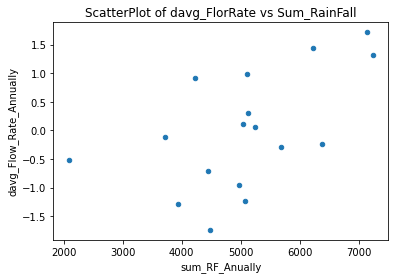

In [75]:
Q1data.plot.scatter(title='ScatterPlot of davg_FlorRate vs Sum_RainFall',x="sum_RF_Anually",y="davg_Flow_Rate_Annually")

<AxesSubplot:title={'center':'ScatterPlot of Lake_Level vs Sum_RainFall'}, xlabel='sum_RF_Anually', ylabel='davg_Lake_Level'>

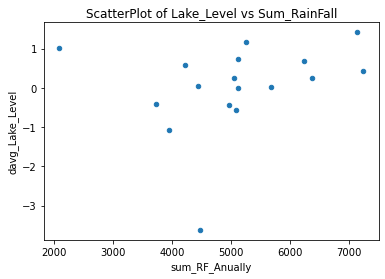

In [76]:
Q1data.plot.scatter(title='ScatterPlot of Lake_Level vs Sum_RainFall',x="sum_RF_Anually",y="davg_Lake_Level")

## 4.6 Analyze flow rate and water level between seasons

In [77]:
# Spring- March April May 
# Summer-June July august 
# Autumn- September, October, November 
# Winter- December January February

# Apply Season Funtion
def make_season(season):
    if season in ['03','04','05']:
        return 'Spring'
    elif season in ['06','07','08']:
        return 'Summer'
    elif season in ['09','10','11']:
        return 'Autumn'
    else:
        return 'Winter'

In [78]:
Lake_Bilancino_Cut['Season'] = Lake_Bilancino_Cut.Month.apply(make_season)

### Questions and Methods
1. Analyze flow rate and water level between seasons
    - Kurtosis Simulation Test
    - Kruskal - Wallis Test

# Lake Level

In [79]:
Lake_Bilancino_Cut.Season.value_counts()

Spring    1564
Winter    1504
Summer    1502
Autumn    1456
Name: Season, dtype: int64


Kurtosis for normal distribution (should be 0): -0.5033583017134986
Skewness of normal distribution (should be 0): -0.7522411671581641


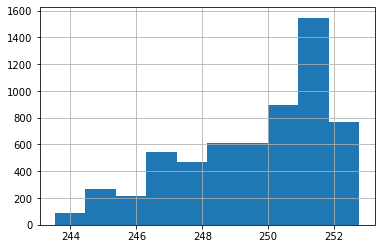

In [80]:
Lake_Bilancino_Cut.Lake_Level.hist()
#Lake_Bilancino_Cut.Lake_Level.describe()
#sns.histplot(data=Lake_Bilancino_Cut, x="Lake_Level")

print( '\nKurtosis for normal distribution (should be 0):', kurtosis(Lake_Bilancino_Cut.Lake_Level)) 
print( 'Skewness of normal distribution (should be 0): {}'.format(skew(Lake_Bilancino_Cut.Lake_Level)))


Kurtosis for normal distribution (should be 0): 7.908177509668862
Skewness of normal distribution (should be 0): -2.746259672934576


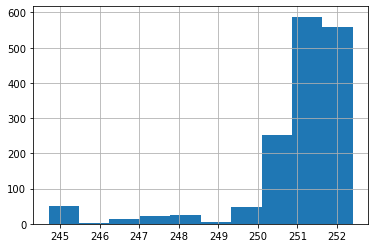

In [81]:
Lake_Bilancino_Cut[Lake_Bilancino_Cut.Season == 'Spring'].Lake_Level.hist()
Spring_Lake_Level = Lake_Bilancino_Cut[Lake_Bilancino_Cut.Season == 'Spring'].Lake_Level
print( '\nKurtosis for normal distribution (should be 0):', kurtosis(Spring_Lake_Level)) 
print( 'Skewness of normal distribution (should be 0): {}'.format(skew(Spring_Lake_Level)))


Kurtosis for normal distribution (should be 0): -0.49416624536716514
Skewness of normal distribution (should be 0): -0.7522149298567467


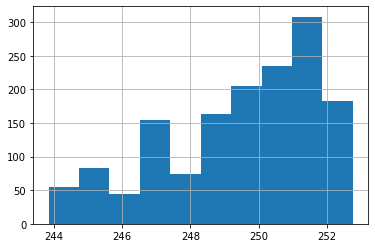

In [82]:
Lake_Bilancino_Cut[Lake_Bilancino_Cut.Season == 'Winter'].Lake_Level.hist()
Winter_Lake_Level = Lake_Bilancino_Cut[Lake_Bilancino_Cut.Season == 'Winter'].Lake_Level
print( '\nKurtosis for normal distribution (should be 0):', kurtosis(Lake_Bilancino_Cut[Lake_Bilancino_Cut.Season == 'Winter'].Lake_Level)) 
print( 'Skewness of normal distribution (should be 0): {}'.format(skew(Winter_Lake_Level)))


Kurtosis for normal distribution (should be 0): 1.3479750284887322
Skewness of normal distribution (should be 0): -1.162173606084193


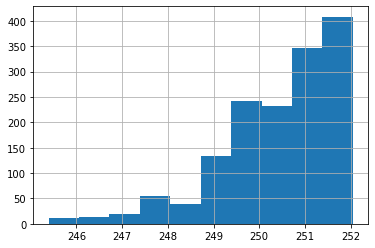

In [83]:
Lake_Bilancino_Cut[Lake_Bilancino_Cut.Season == 'Summer'].Lake_Level.hist()
Summer_Lake_Level = Lake_Bilancino_Cut[Lake_Bilancino_Cut.Season == 'Summer'].Lake_Level
print( '\nKurtosis for normal distribution (should be 0):', kurtosis(Summer_Lake_Level)) 
print( 'Skewness of normal distribution (should be 0): {}'.format(skew(Summer_Lake_Level)))


Kurtosis for normal distribution (should be 0): -0.1288667126969134
Skewness of normal distribution (should be 0): -0.23664741215027785


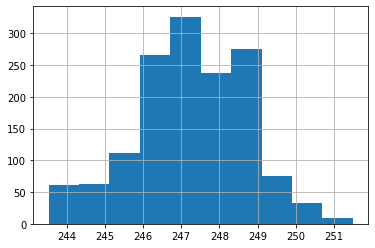

In [84]:
Lake_Bilancino_Cut[Lake_Bilancino_Cut.Season == 'Autumn'].Lake_Level.hist()
Autumn_Lake_Level = Lake_Bilancino_Cut[Lake_Bilancino_Cut.Season == 'Autumn'].Lake_Level
print( '\nKurtosis for normal distribution (should be 0):', kurtosis(Lake_Bilancino_Cut[Lake_Bilancino_Cut.Season == 'Autumn'].Lake_Level)) 
print( 'Skewness of normal distribution (should be 0): {}'.format(skew(Autumn_Lake_Level)))

# Flow Rate


Kurtosis for normal distribution : 60.39221118451545


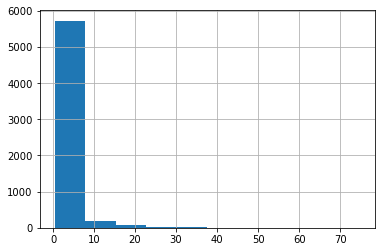

In [85]:
Lake_Bilancino_Cut.Flow_Rate.hist()
Lake_Bilancino_Cut.Flow_Rate.describe()

# An extreme positive kurtosis indicates a distribution where more of the values are located
# in the tails of the distribution rather than around the mean.
print( '\nKurtosis for normal distribution :', kurtosis(Lake_Bilancino_Cut.Flow_Rate)) 

<AxesSubplot:>

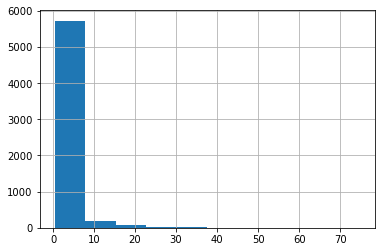

In [19]:
# Logistically Transform the Flow Rate
Lake_Bilancino_Cut.Flow_Rate.hist()

<AxesSubplot:>

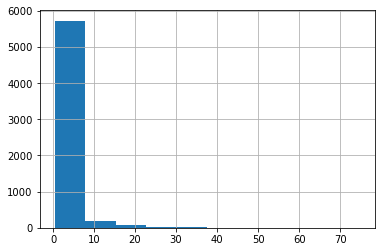

In [86]:
# Square Root Transform the Flow Rate
Lake_Bilancino_Cut.Flow_Rate.hist()


Kurtosis for normal distribution (should be 0): 27.558922256853283
Skewness of normal distribution (should be 0): 3.9065287852494053


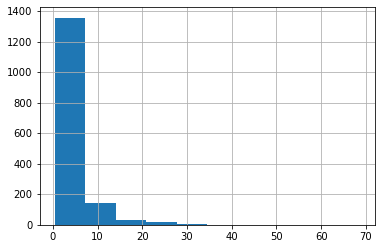

In [87]:
Lake_Bilancino_Cut[Lake_Bilancino_Cut.Season == 'Spring'].Flow_Rate.hist()
Spring_Flow_Rate = Lake_Bilancino_Cut[Lake_Bilancino_Cut.Season == 'Spring'].Flow_Rate

print( '\nKurtosis for normal distribution (should be 0):', kurtosis(Spring_Flow_Rate)) 
print( 'Skewness of normal distribution (should be 0): {}'.format(skew(Spring_Flow_Rate)))


Kurtosis for normal distribution (should be 0): 36.52927105368438
Skewness of normal distribution (should be 0): 4.767458306303771


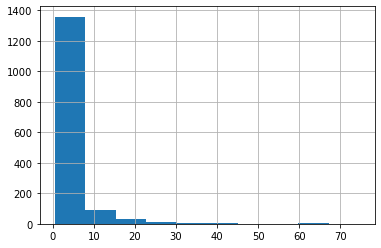

In [88]:
Lake_Bilancino_Cut[Lake_Bilancino_Cut.Season == 'Winter'].Flow_Rate.hist()
Winter_Flow_Rate = Lake_Bilancino_Cut[Lake_Bilancino_Cut.Season == 'Winter'].Flow_Rate

print( '\nKurtosis for normal distribution (should be 0):', kurtosis(Winter_Flow_Rate)) 
print( 'Skewness of normal distribution (should be 0): {}'.format(skew(Winter_Flow_Rate)))


Kurtosis for normal distribution (should be 0): 0.4743729364028657
Skewness of normal distribution (should be 0): 0.6754771720981214


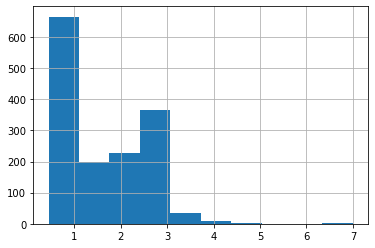

In [89]:
Lake_Bilancino_Cut[Lake_Bilancino_Cut.Season == 'Summer'].Flow_Rate.hist()
Summer_Flow_Rate = Lake_Bilancino_Cut[Lake_Bilancino_Cut.Season == 'Summer'].Flow_Rate

print( '\nKurtosis for normal distribution (should be 0):', kurtosis(Summer_Flow_Rate)) 
print( 'Skewness of normal distribution (should be 0): {}'.format(skew(Summer_Flow_Rate)))


Kurtosis for normal distribution (should be 0): 63.928586332556335
Skewness of normal distribution (should be 0): 6.053635014272246


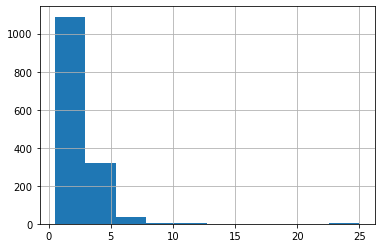

In [90]:
Lake_Bilancino_Cut[Lake_Bilancino_Cut.Season == 'Autumn'].Flow_Rate.hist()
Autumn_Flow_Rate = Lake_Bilancino_Cut[Lake_Bilancino_Cut.Season == 'Autumn'].Flow_Rate

print( '\nKurtosis for normal distribution (should be 0):', kurtosis(Autumn_Flow_Rate)) 
print( 'Skewness of normal distribution (should be 0): {}'.format(skew(Autumn_Flow_Rate)))

### Kruskal Wallis Test for Lake Level

In [91]:
stats.kruskal(Spring_Lake_Level, Autumn_Lake_Level)
stats.kruskal(Spring_Lake_Level, Winter_Lake_Level)
stats.kruskal(Spring_Lake_Level, Summer_Lake_Level)

stats.kruskal(Autumn_Lake_Level, Winter_Lake_Level)
stats.kruskal(Autumn_Lake_Level, Summer_Lake_Level)
stats.kruskal(Winter_Lake_Level, Summer_Lake_Level)

KruskalResult(statistic=81.75675879509366, pvalue=1.539093487057443e-19)

### Kruskal Wallis Test for Flow Rate

In [92]:
stats.kruskal(Spring_Flow_Rate, Autumn_Flow_Rate)
stats.kruskal(Spring_Flow_Rate, Winter_Flow_Rate)
stats.kruskal(Spring_Flow_Rate, Summer_Flow_Rate)

stats.kruskal(Autumn_Flow_Rate, Winter_Flow_Rate)
stats.kruskal(Autumn_Flow_Rate, Summer_Flow_Rate)
stats.kruskal(Winter_Flow_Rate, Summer_Flow_Rate)

KruskalResult(statistic=42.291331169973994, pvalue=7.864036504484014e-11)

## 4.7 Investigate the amount of rainfall in each area

In [93]:
LakeData=pd.read_csv('Lake_Bilancino.csv')
LakeData

Date  Rainfall_S_Piero  Rainfall_Mangona  Rainfall_S_Agata  \
0     03/06/2002               NaN               NaN               NaN   
1     04/06/2002               NaN               NaN               NaN   
2     05/06/2002               NaN               NaN               NaN   
3     06/06/2002               NaN               NaN               NaN   
4     07/06/2002               NaN               NaN               NaN   
...          ...               ...               ...               ...   
6598  26/06/2020               0.0               0.0               0.0   
6599  27/06/2020               0.0               0.0               0.0   
6600  28/06/2020               0.0               0.0               0.0   
6601  29/06/2020               0.0               0.0               0.0   
6602  30/06/2020               0.0               0.0               0.0   

      Rainfall_Cavallina  Rainfall_Le_Croci  Temperature_Le_Croci  Lake_Level  \
0                    NaN                NaN                   NaN      249.43   
1                    NaN                NaN                   NaN      249.43   
2                    NaN                NaN                   NaN      249.43   
3                    NaN                NaN                   NaN      249.43   
4                    NaN                NaN                   NaN      249.44   
...                  ...                ...                   ...         ...   
6598                 0.0                0.0                 22.50      250.85   
6599                 0.0                0.0                 23.40      250.84   
6600                 0.0                0.0                 21.50      250.83   
6601                 0.0                0.0                 23.20      250.82   
6602                 0.0                0.0                 22.75      250.80   

      Flow_Rate  
0          0.31  
1          0.31  
2          0.31  
3          0.31  
4          0.31  
...         ...  
6598       0.60  
6599       0.60  
6600       0.60  
6601       0.60  
6602       0.60  

[6603 rows x 9 columns]

In [94]:
LakeData=LakeData.dropna()
LakeData['totalRainfall']=LakeData.Rainfall_S_Piero+LakeData.Rainfall_Mangona+LakeData.Rainfall_S_Agata+LakeData.Rainfall_Cavallina+LakeData.Rainfall_Le_Croci
LakeData

<ipython-input-94-022f43b6541c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LakeData['totalRainfall']=LakeData.Rainfall_S_Piero+LakeData.Rainfall_Mangona+LakeData.Rainfall_S_Agata+LakeData.Rainfall_Cavallina+LakeData.Rainfall_Le_Croci


Date  Rainfall_S_Piero  Rainfall_Mangona  Rainfall_S_Agata  \
578   02/01/2004               0.0               0.0               0.0   
579   03/01/2004               0.0               0.0               0.0   
580   04/01/2004               0.0               0.0               0.0   
581   05/01/2004               0.2               0.0               0.0   
582   06/01/2004               0.0               0.0               0.0   
...          ...               ...               ...               ...   
6598  26/06/2020               0.0               0.0               0.0   
6599  27/06/2020               0.0               0.0               0.0   
6600  28/06/2020               0.0               0.0               0.0   
6601  29/06/2020               0.0               0.0               0.0   
6602  30/06/2020               0.0               0.0               0.0   

      Rainfall_Cavallina  Rainfall_Le_Croci  Temperature_Le_Croci  Lake_Level  \
578                  0.0                0.0                  6.50      251.21   
579                  0.0                0.0                  4.45      251.28   
580                  0.0                0.0                  2.00      251.35   
581                  0.0                0.0                  0.90      251.37   
582                  0.0                0.0                  2.25      251.42   
...                  ...                ...                   ...         ...   
6598                 0.0                0.0                 22.50      250.85   
6599                 0.0                0.0                 23.40      250.84   
6600                 0.0                0.0                 21.50      250.83   
6601                 0.0                0.0                 23.20      250.82   
6602                 0.0                0.0                 22.75      250.80   

      Flow_Rate  totalRainfall  
578         0.5            0.0  
579         0.5            0.0  
580         0.5            0.0  
581         0.5            0.2  
582         0.5            0.0  
...         ...            ...  
6598        0.6            0.0  
6599        0.6            0.0  
6600        0.6            0.0  
6601        0.6            0.0  
6602        0.6            0.0  

[6025 rows x 10 columns]

<AxesSubplot:title={'center':'Average Amount of Rain in Each Area'}>

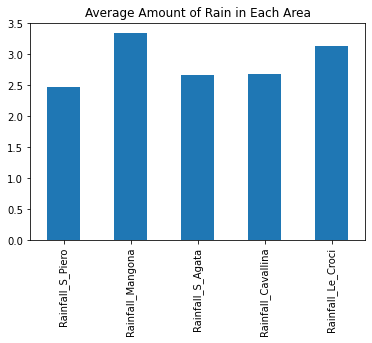

In [95]:
Rain = LakeData.drop(columns = ['Temperature_Le_Croci','Lake_Level','Flow_Rate','totalRainfall','Date']).mean().plot(kind = 'bar', title = 'Average Amount of Rain in Each Area')
Rain

In [96]:
Avg_Rain = LakeData.mean()
Avg_Rain

Rainfall_S_Piero          2.471635
Rainfall_Mangona          3.341212
Rainfall_S_Agata          2.670440
Rainfall_Cavallina        2.675187
Rainfall_Le_Croci         3.130390
Temperature_Le_Croci     14.530141
Lake_Level              249.553472
Flow_Rate                 2.778204
totalRainfall            14.288863
dtype: float64

In [97]:
Avg = (2.471635+3.341212+2.670440+2.675187+3.130390)/5
Avg

2.8577728000000002

In [98]:
sd1 = np.std(LakeData['Rainfall_S_Piero'])
sd1

6.649935605050562

In [99]:
z1 = (2.471635 - Avg) / (sd1/np.sqrt(6025))
z1

-4.50716444492844

In [100]:
sd2 = np.std(LakeData['Rainfall_Mangona'])
sd2

8.903030368099541

In [101]:
z2 = (3.341212 - Avg) / (sd2/np.sqrt(6025))
z2

4.214853979781616

In [102]:
sd3 = np.std(LakeData['Rainfall_S_Agata'])
sd3

7.166582955553385

In [103]:
z3 = (2.670440 - Avg) / (sd3/np.sqrt(6025))
z3

-2.0289914535113187

In [104]:
sd4 = np.std(LakeData['Rainfall_Cavallina'])
sd4

7.655768962626437

In [107]:
z4 = (2.675187 - Avg) / (sd4/np.sqrt(6025))
z4

-1.8512143392085685

In [108]:
sd5 = np.std(LakeData['Rainfall_Le_Croci'])
sd5

8.025019440866553

In [109]:
z5 = (3.130390 - Avg) / (sd5/np.sqrt(6025))
z5

2.636851579731661